In [7]:
import pandas as pd
import os
import numpy as np
import re
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import sys

sys.path.append('/Users/melek/Documents/GitHub/OCCTOPI')
from functions.data_cleaner import data_cleaner

# Data files

In [2]:
folder_location = '/Users/melek/Desktop/Research/Research Fall 2024/OCCTOPI/Smart_Plugs_Bert_2024-08-01T00-00-00_00Z_to_2024-09-24T00-00-00_00Z/'

In [3]:
# Create a dictionary to store DataFrames
dataframes = {}

# Iterate through each file in the folder
for filename in os.listdir(folder_location):
    if filename.endswith('.csv'):
        # Define the full path of the file
        file_path = os.path.join(folder_location, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Use the filename without extension as the dictionary key
        df_name = os.path.splitext(filename)[0]
        dataframes[df_name] = df

In [4]:
def rename_df(original_name):
    # Extract the initials and date from the filename
    match = re.search(r"Smart_Plugs_Bert_(\d{4}-\d{2}-\d{2})T", original_name)
    if match:
        date_str = match.group(1).replace("-", "")  # Format date as MMDDYYYY
        short_name = f"SPB_{date_str[4:]}{date_str[:4]}"
        return short_name
    return original_name  # Return original if pattern doesn't match

renamed_dataframes = {rename_df(name): df for name, df in dataframes.items()}

dataframes = renamed_dataframes

## combining data

In [8]:
combined_df = pd.concat(dataframes.values(), ignore_index=True)
combined_df = data_cleaner(combined_df)

# Metadata

In [10]:
folder_location = '/Users/melek/Desktop/Research/Research Fall 2024/OCCTOPI/'

In [11]:
devices_new = pd.read_csv('/Users/melek/Desktop/Research/Research Fall 2024/OCCTOPI/PLC Maintenance - Master List NEW.csv')

In [12]:
devices_old = pd.read_csv('/Users/melek/Desktop/Research/Research Fall 2024/OCCTOPI/Full Appliance and SmartOutlet List with Filters OLD.csv')

In [13]:
devices_new['Status'].unique()

array(['Good', 'Updated appliance', 'Missing', 'Updated Location',
       'Updated Appliance', nan, 'Updated Room', 'Updated room'],
      dtype=object)

In [14]:
devices_old['July Full Inspection'].unique()

array(['disconnected', 'checked', 'plug present, TV disconnected', nan,
       'missing', 'checked ', 'come back later ',
       'computer is disconnected',
       'connected to both coffee machine and toaster', 'Checked',
       'reconnected', 'connected'], dtype=object)

In [15]:
matching_devices = pd.merge(devices_old, devices_new, left_on='MAC', right_on='BERT MAC', how='inner')
matching_devices['Bacnet_ID'] = matching_devices['Bacnet_ID'].astype('int64')

# Device mapping

In [16]:
combined_df = combined_df.merge(matching_devices[['Bacnet_ID', 'Type ']], 
                                 left_on='device_id', right_on='Bacnet_ID', 
                                 how='left').drop(columns='Bacnet_ID').rename(columns={'Type ': 'Type'})
combined_df = combined_df[combined_df['Type'].notna()]

In [17]:
devices = {}
for i in combined_df['Type'].unique():
    devices[i] = combined_df[combined_df['Type'] == i]

# Device Analysis

In [18]:
for device_type in devices.keys():
    print(device_type)

TV
Computer
Printer
Water Dispenser
Copier
Coffee Machine
Air Purifier
Scanner
Fax
Dell


**Note** I ended up commenting out the below cell (that was supposed to run all the device types on different plots) because the code kept crashing. There is obviously way too much data. Hence, each device type will be run individually.

In [ ]:
# import plotly.graph_objects as go
# for device_type in devices.keys():
#     fig = go.Figure()
    
#     # Loop through unique device_ids
#     for device_id in devices[device_type]['device_id'].unique():
#         device_data = devices[device_type][devices[device_type]['device_id'] == device_id]
        
#         # Add a trace for each device
#         fig.add_trace(go.Scatter(
#             x=device_data['Time'],
#             y=device_data['Power'],
#             mode='lines',
#             name=f'Device {device_id}'  # Add label to each device's line
#         ))
    
#     # Update layout for clarity
#     fig.update_layout(
#         title=f"Power Usage vs Time for Different {device_type}",
#         xaxis_title="Time",
#         yaxis_title="Power",
#         legend_title="Device ID"
#     )
    
#     fig.show()

As a first go, let's just look at what the data looks like for each device! The below function will help us do this redundunt task

In [ ]:
def plt_device(device):
# Initialize the plot
    plt.figure(figsize=(20, 6))
    
    # Loop through unique device_ids
    for device_id in devices[device]['device_id'].unique():
        device_data = devices[device][devices[device]['device_id'] == device_id]
        
        # Plot each device's data as a line
        plt.plot(
            device_data['Time'],
            device_data['Power'],
            label=f'Device {device_id}'  # Label for legend
        )
    
    # Update layout for clarity
    plt.title(f"Power Usage vs Time for Different {device}s")
    plt.xlabel("Time")
    plt.ylabel("Power")
    plt.legend(title="Device ID", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)  
    plt.grid(True)  # Add grid for easier readability
    
    # Show the plot
    plt.show()

## Air Purifier

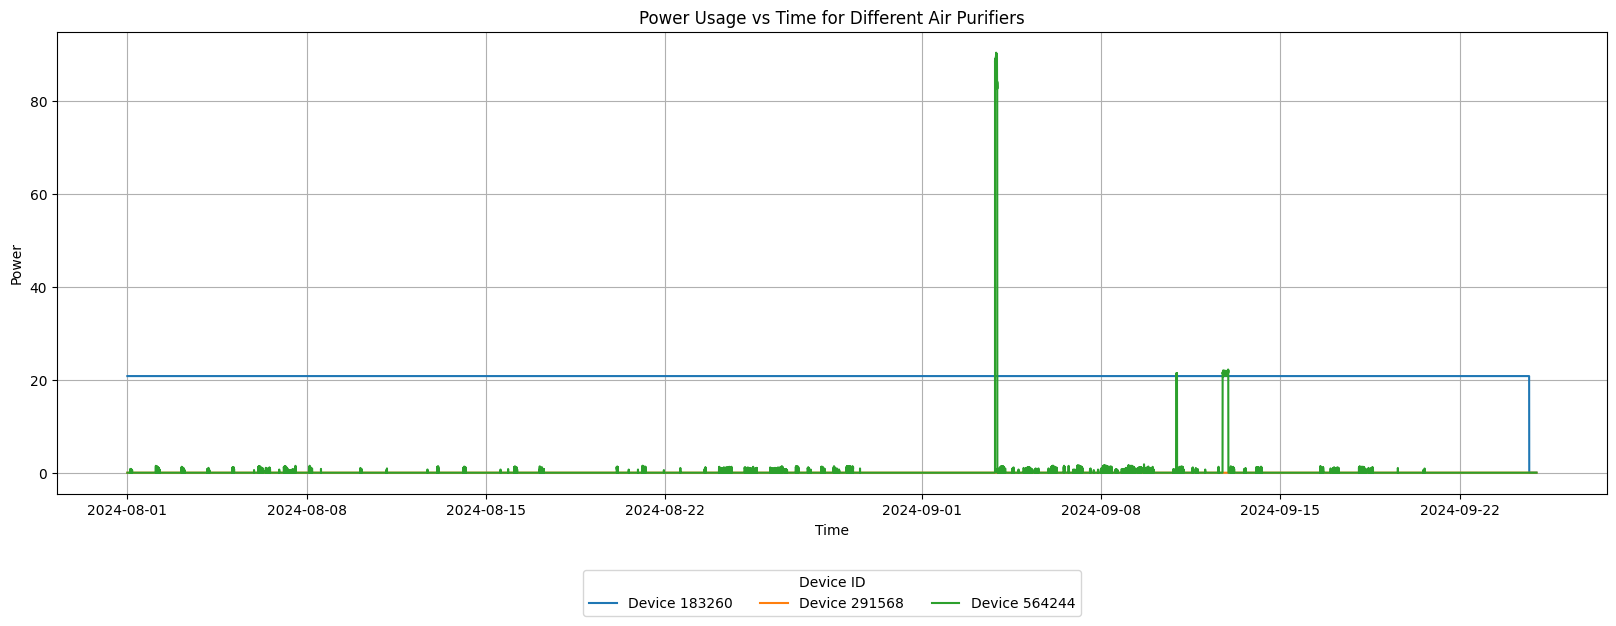

In [ ]:
device = 'Air Purifier'
plt_device(device)

In [ ]:
# fig = go.Figure()

# # Loop through unique device_ids
# for device_id in devices['Air Purifier']['device_id'].unique():
#     device_data = devices['Air Purifier'][devices['Air Purifier']['device_id'] == device_id]
    
#     # Add a trace for each device
#     fig.add_trace(go.Scatter(
#         x=device_data['Time'],
#         y=device_data['Power'],
#         mode='lines',
#         name=f'Device {device_id}'  # Add label to each device's line
#     ))

# # Update layout for clarity
# fig.update_layout(
#     title="Power Usage vs Time for Different Air Purifiers",
#     xaxis_title="Time",
#     yaxis_title="Power",
#     legend_title="Device ID"
# )

# fig.show()

## TV

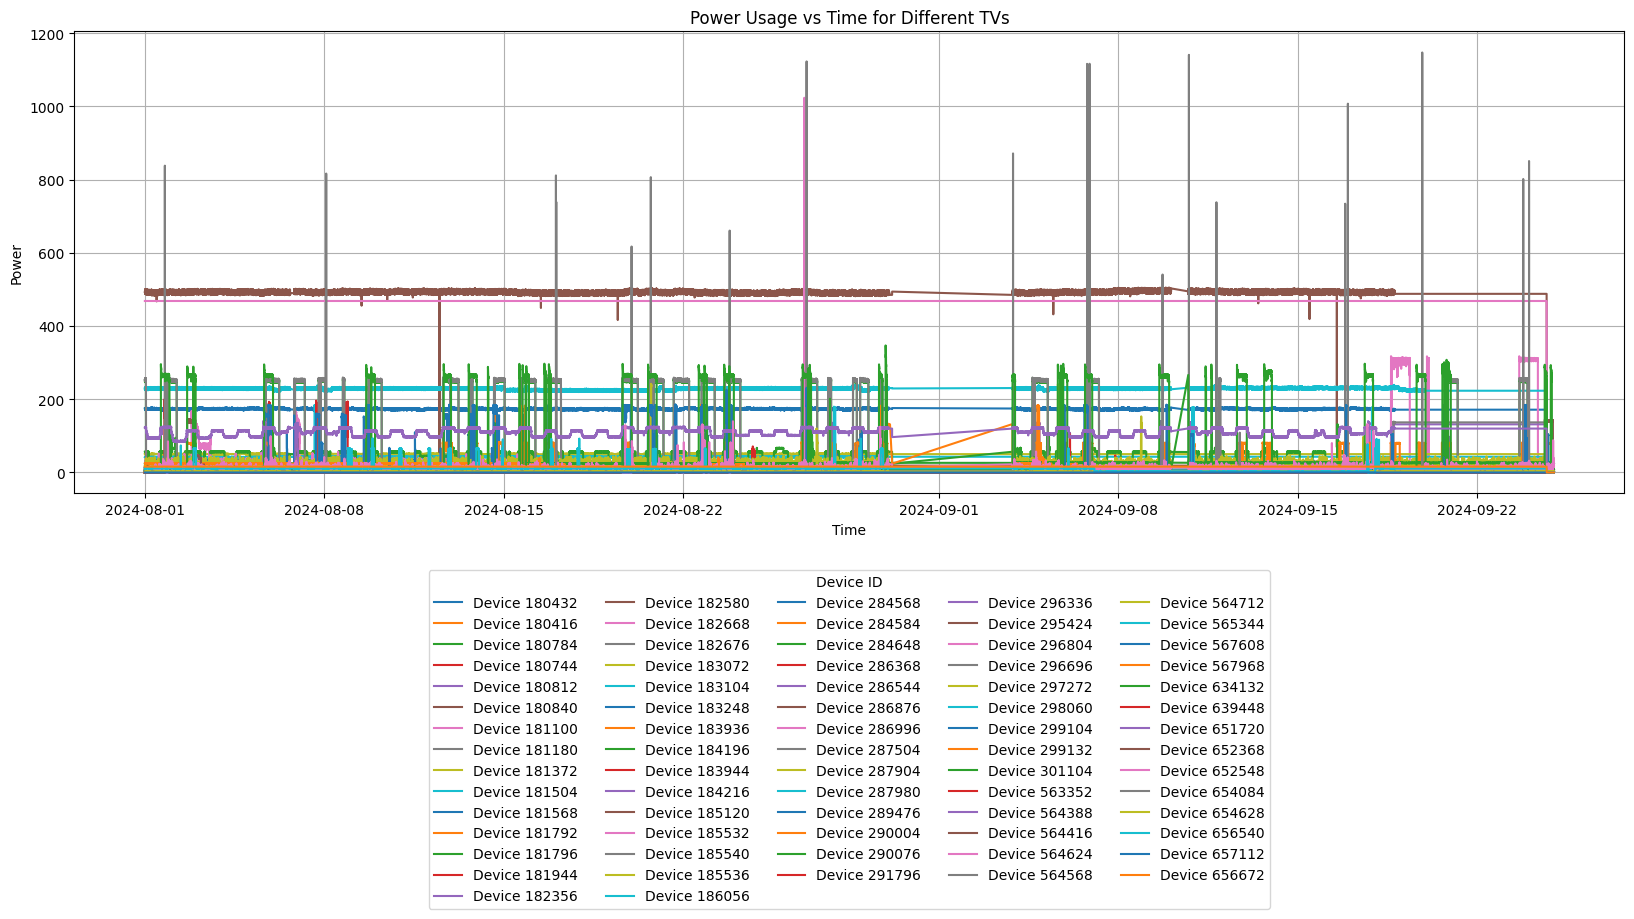

In [ ]:
device = 'TV'
plt_device(device)

In [ ]:
# fig = go.Figure()

# # Loop through unique device_ids
# for device_id in devices['TV']['device_id'].unique():
#     device_data = devices['TV'][devices['TV']['device_id'] == device_id]
    
#     # Add a trace for each device
#     fig.add_trace(go.Scatter(
#         x=device_data['Time'],
#         y=device_data['Power'],
#         mode='lines',
#         name=f'Device {device_id}'  # Add label to each device's line
#     ))

# # Update layout for clarity
# fig.update_layout(
#     title="Power Usage vs Time for Different TVs",
#     xaxis_title="Time",
#     yaxis_title="Power",
#     legend_title="Device ID"
# )

# fig.show()

## Computer + Dell

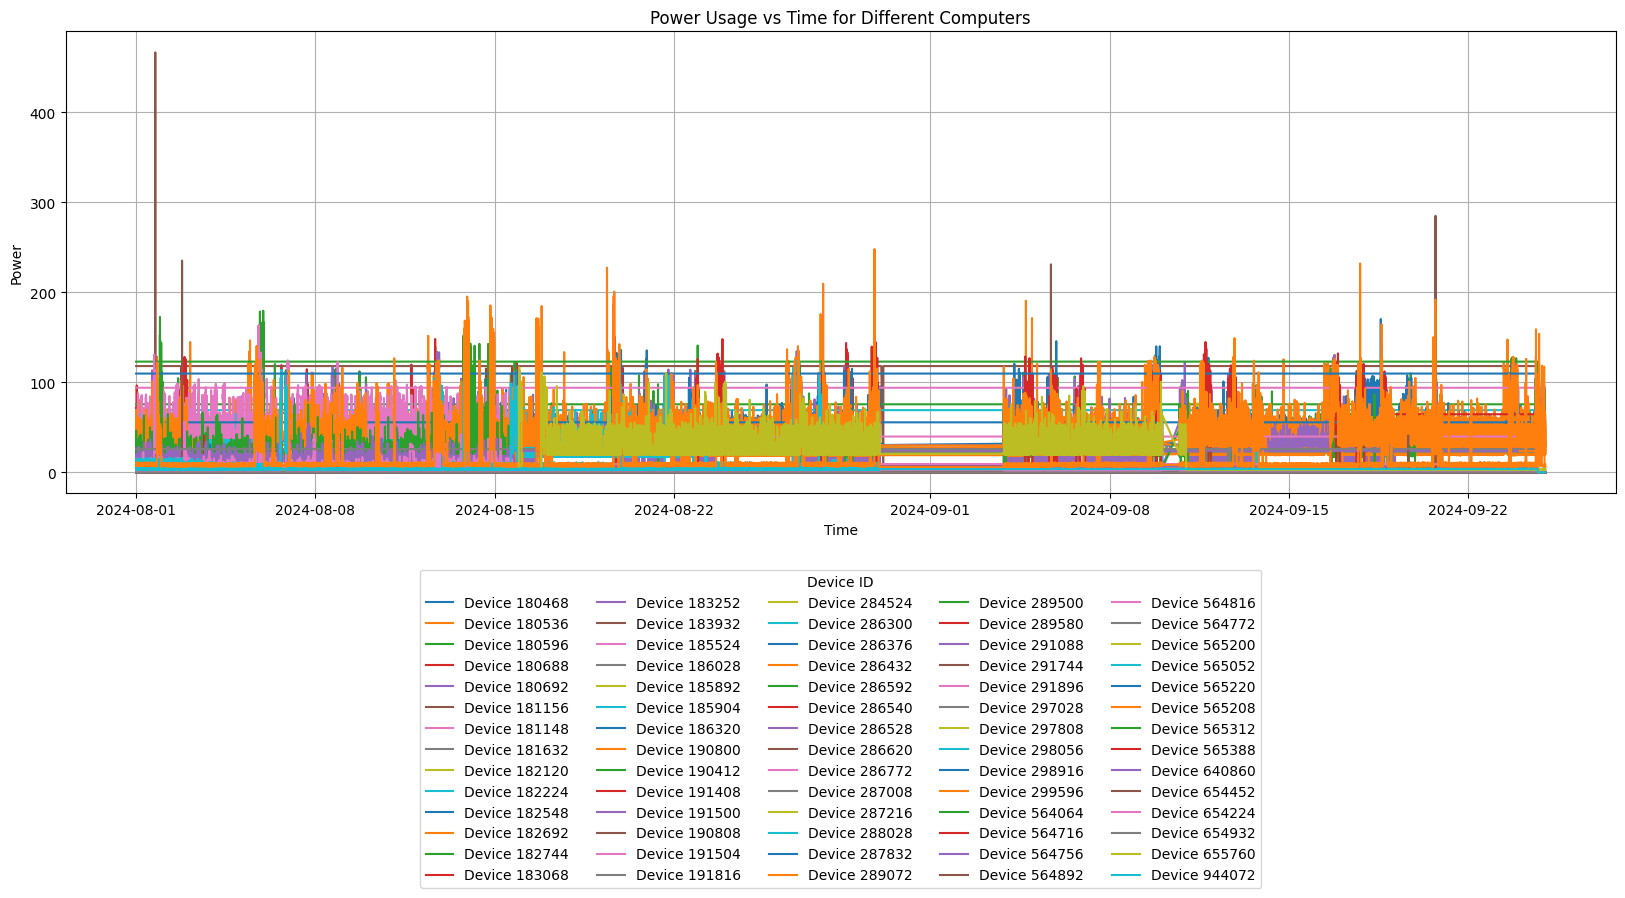

In [ ]:
plt_device('Computer')

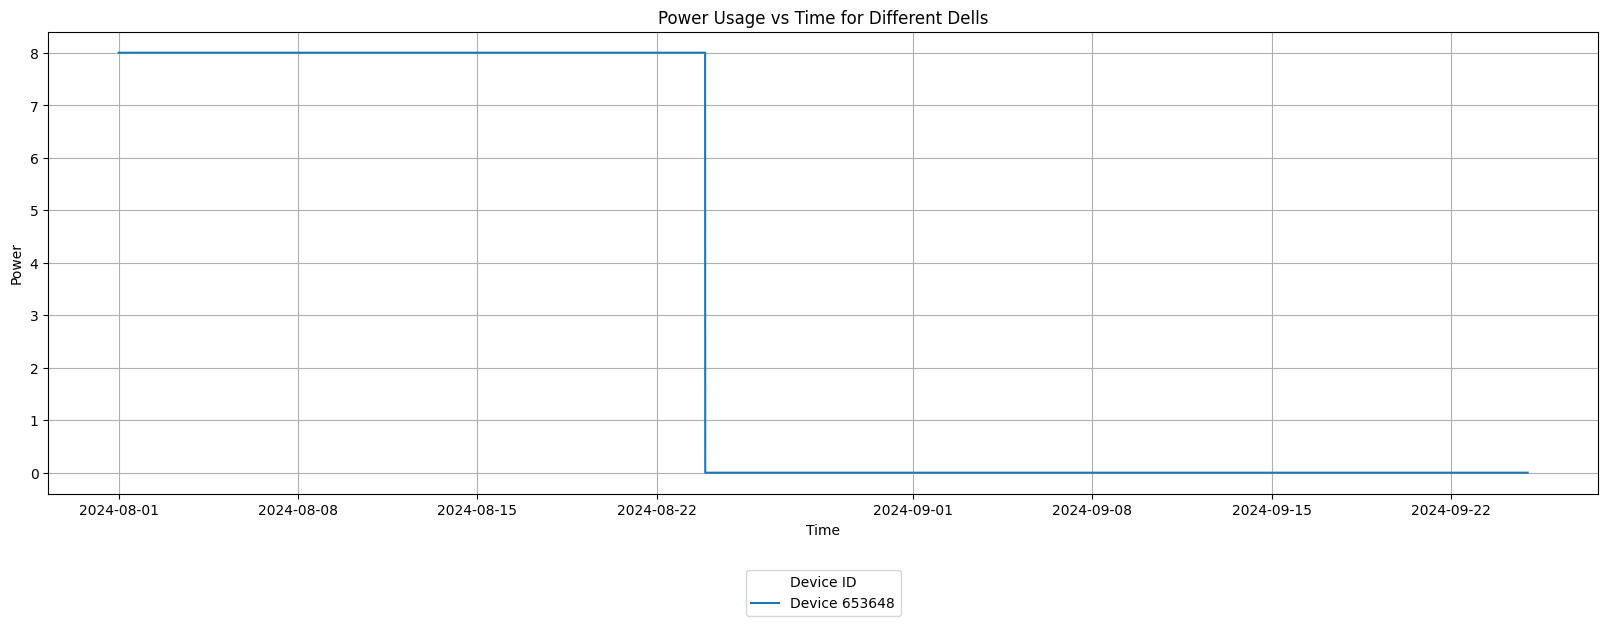

In [ ]:
plt_device('Dell')

okay maybe let's drop the Dell

## Printer

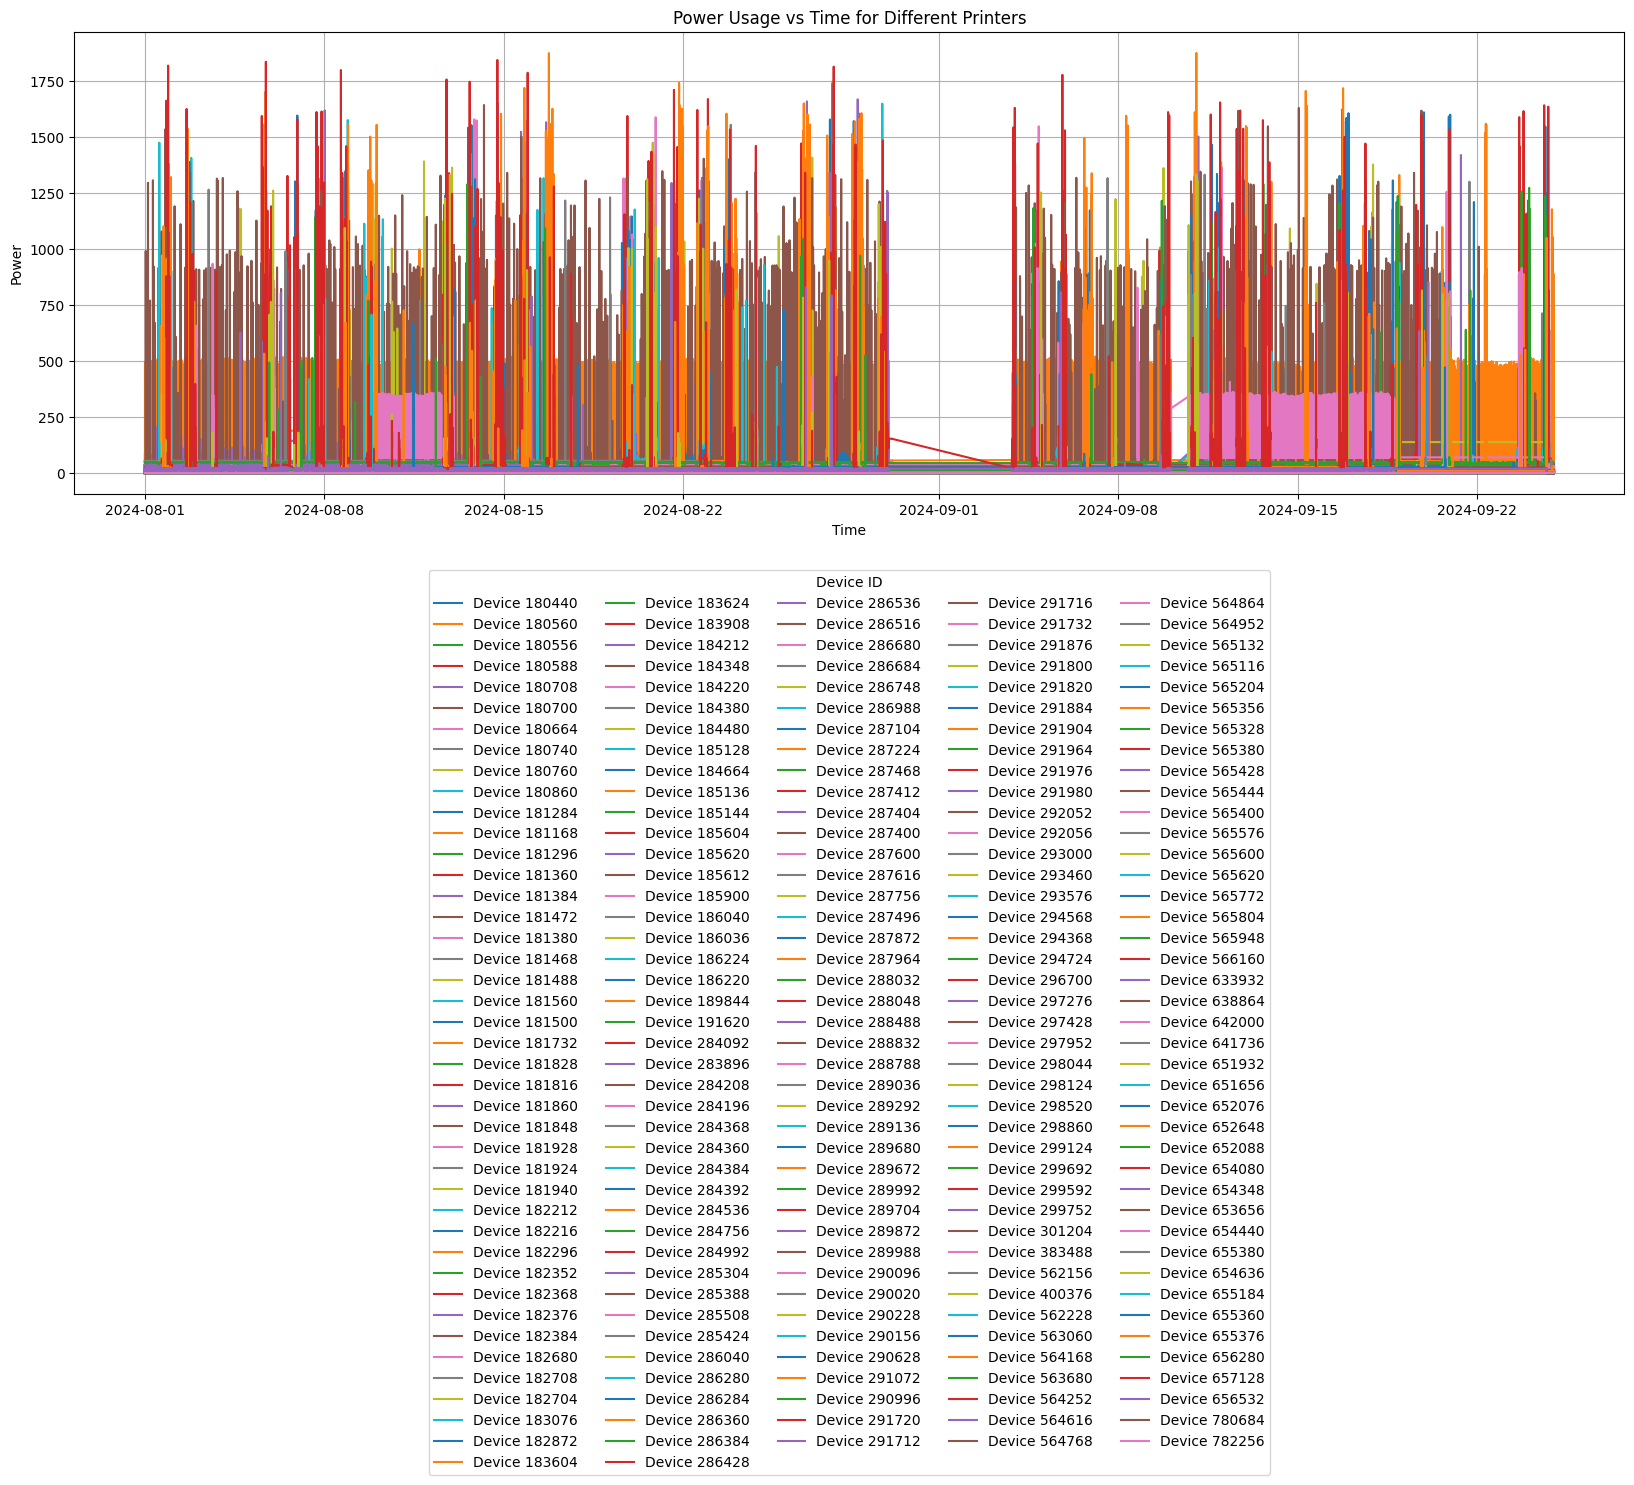

In [ ]:
plt_device('Printer')

## Water Dispenser

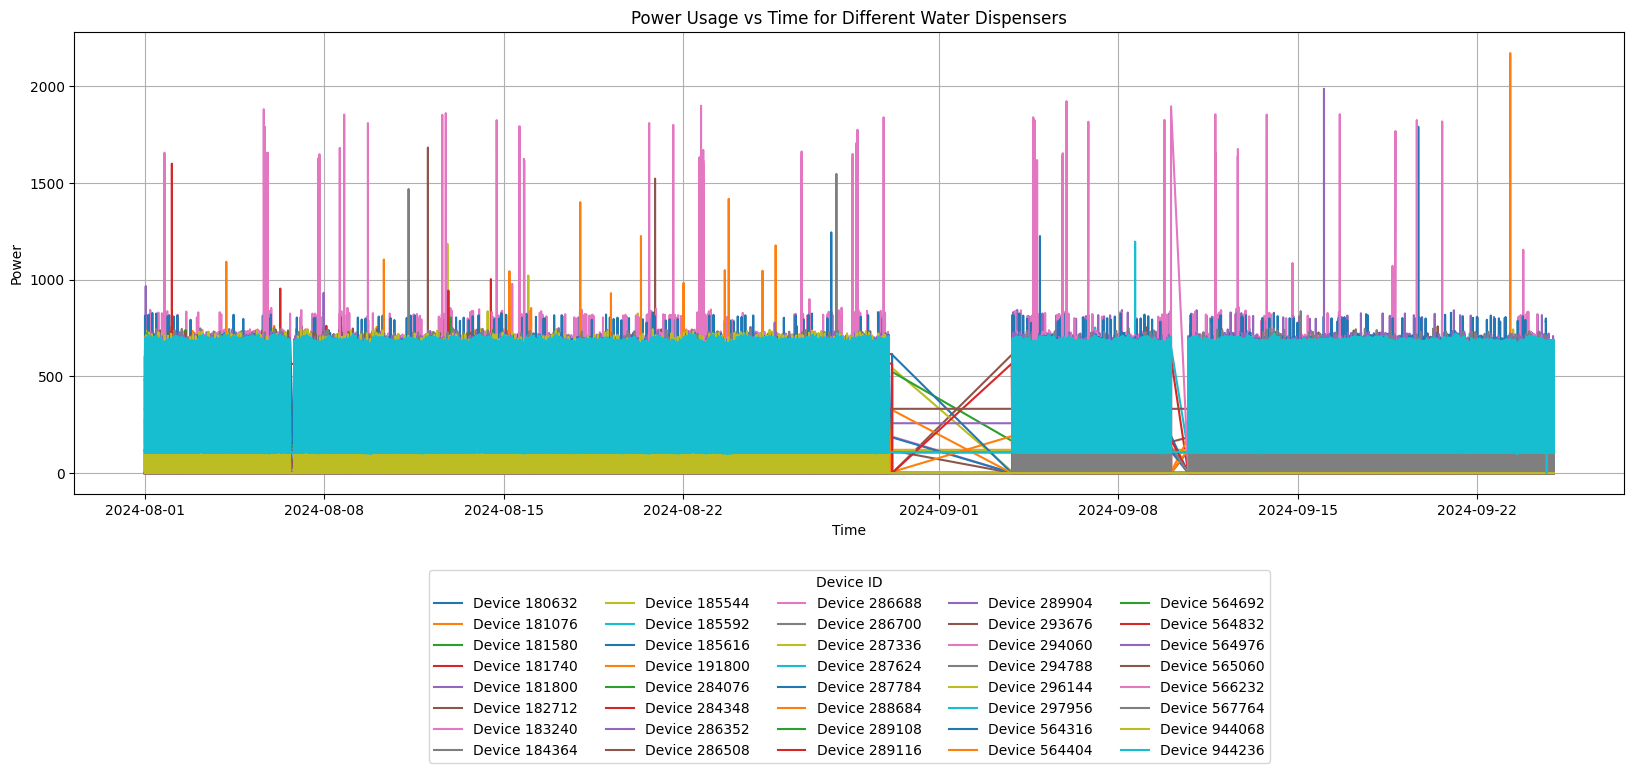

In [ ]:
plt_device('Water Dispenser')

## Copier

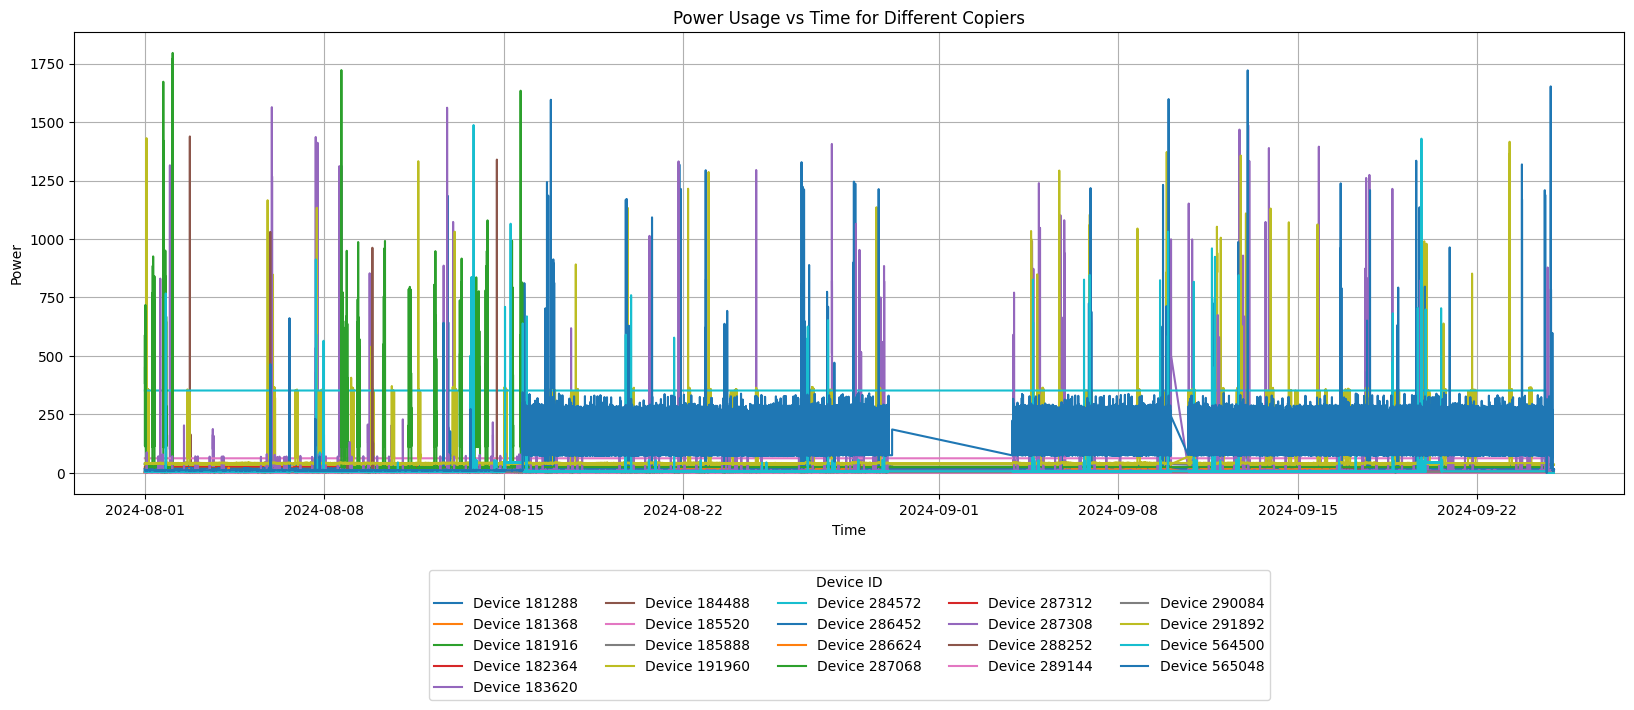

In [ ]:
plt_device('Copier')

## Coffee Machine

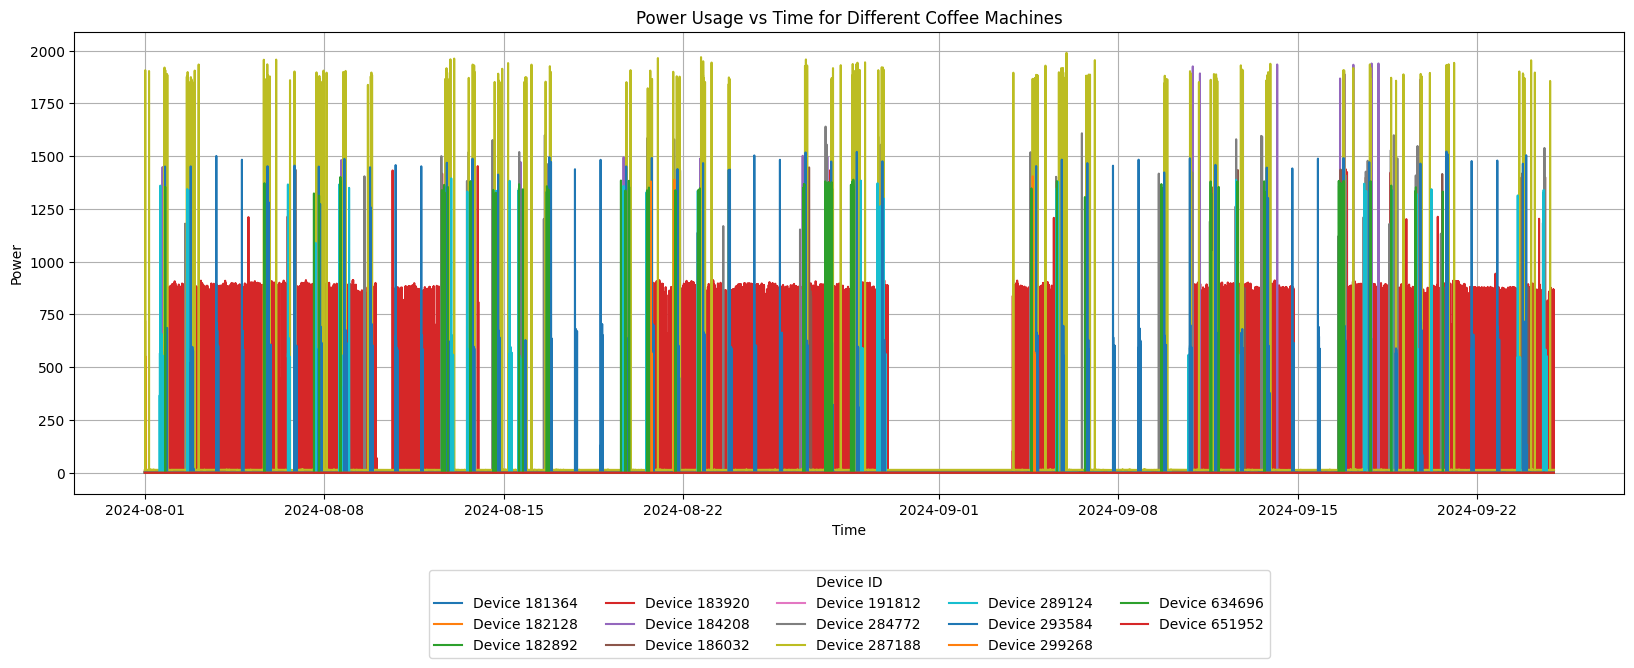

In [ ]:
plt_device('Coffee Machine')

## Scanner

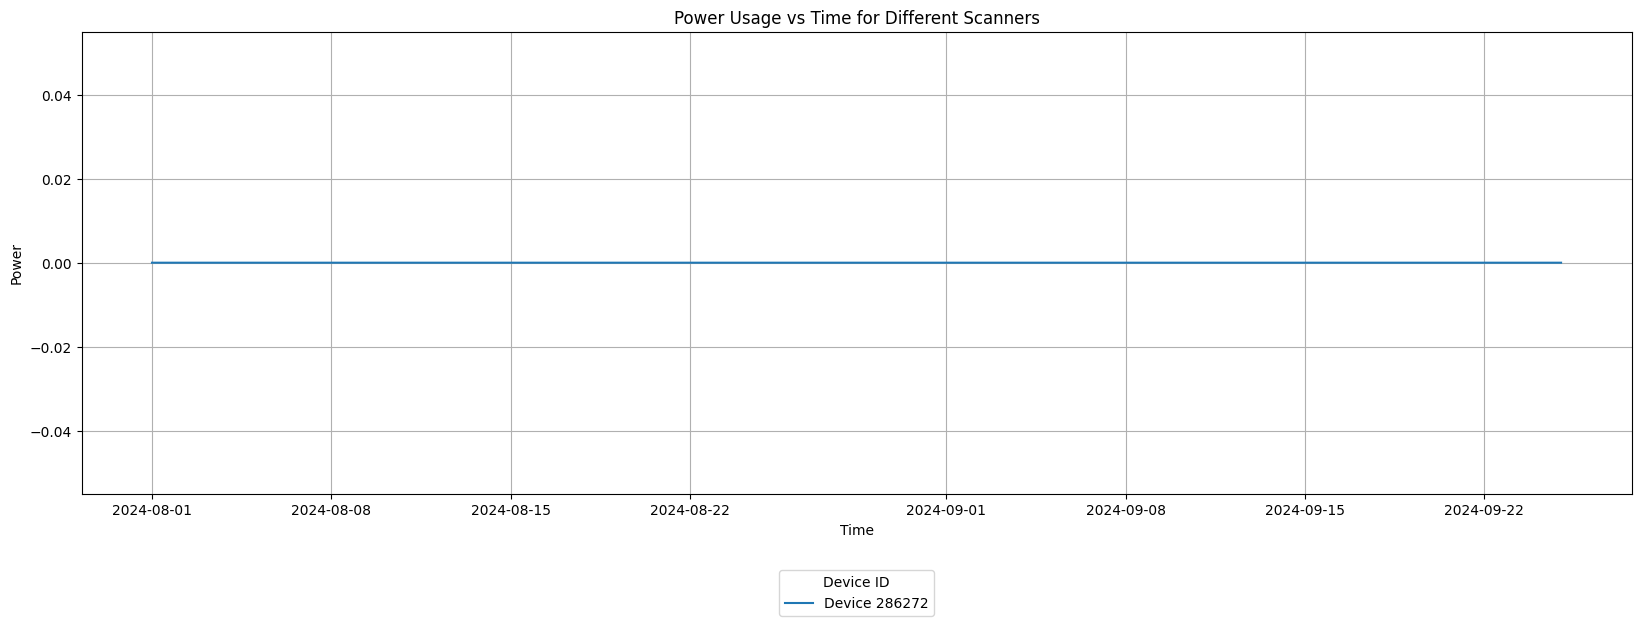

In [ ]:
plt_device('Scanner')

In [ ]:
devices['Scanner'].describe()

,device_id,Power,Energy
count,70760.0,70760.0,70760.0
mean,286272.0,0.0,0.0
std,0.0,0.0,0.0
min,286272.0,0.0,0.0
25%,286272.0,0.0,0.0
50%,286272.0,0.0,0.0
75%,286272.0,0.0,0.0
max,286272.0,0.0,0.0


## Fax

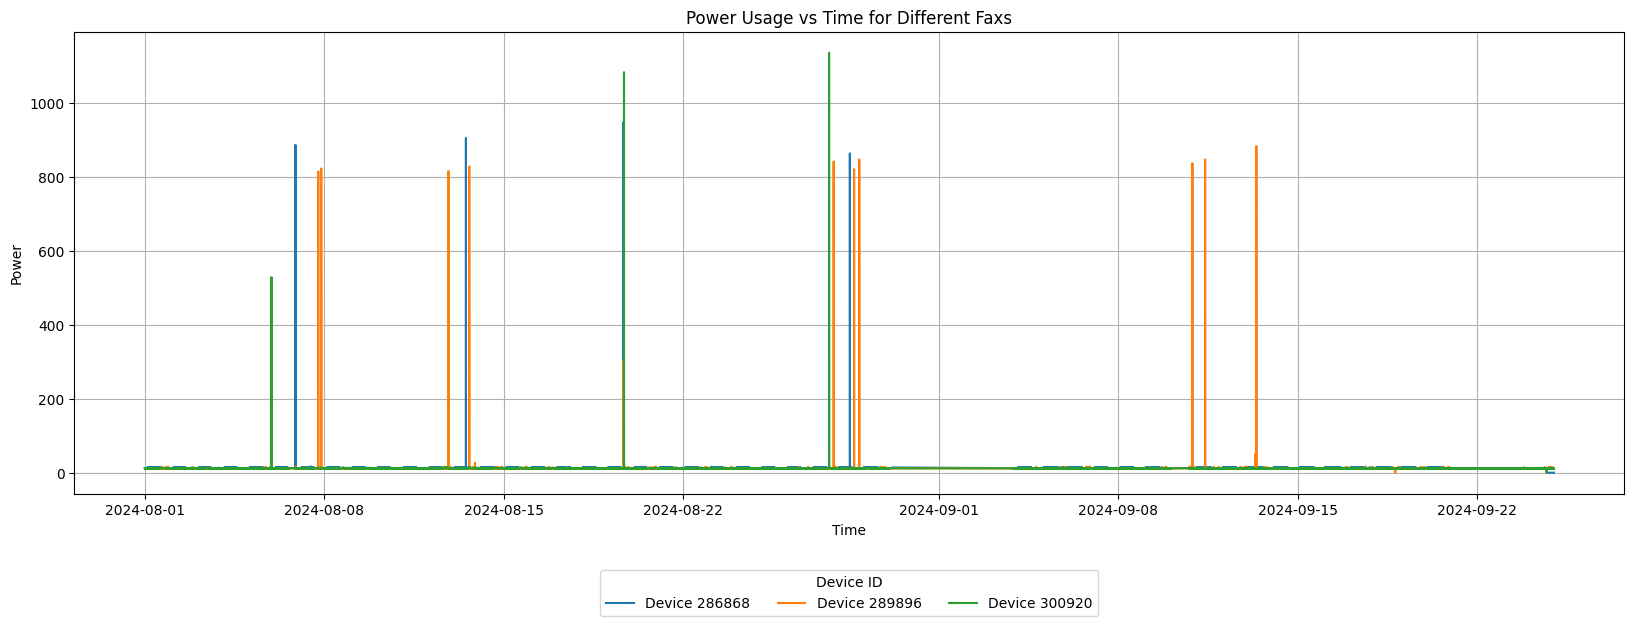

In [ ]:
plt_device('Fax')

In [ ]:
devices['Fax'][devices['Fax']['device_id']==300920].describe()

,device_id,Power,Energy
count,70763.0,70763.000000,70763.000000
mean,300920.0,11.911429,0.000087
std,0.0,6.166778,0.000074
min,300920.0,0.000000,0.000000
25%,300920.0,11.640000,0.000074
50%,300920.0,11.834000,0.000083
75%,300920.0,12.054000,0.000096
max,300920.0,1136.500000,0.010485


# Saving data

In [ ]:
for device_type in devices.keys():
    df.to_csv(f"{device_type}_data.csv", index=False)

In [ ]:
devices['TV'].to_csv(f"{'TV'}_data.csv", index=False)

,Time,device_id,Power,Energy,Type
0,2024-08-01 00:00:02.921962+00:00,180432,175.760,0.000000,TV
3,2024-08-01 00:00:03.024250+00:00,180416,0.000,0.000000,TV
24,2024-08-01 00:00:03.682638+00:00,180784,3.500,0.000028,TV
27,2024-08-01 00:00:03.769748+00:00,180744,0.000,0.000000,TV
29,2024-08-01 00:00:03.839328+00:00,180812,0.000,0.000000,TV
...,...,...,...,...,...
47692351,2024-09-24 23:59:52.897416+00:00,654084,3.304,0.000023,TV
47692356,2024-09-24 23:59:53.009280+00:00,654628,2.640,0.000024,TV
47692371,2024-09-24 23:59:53.321520+00:00,657112,0.000,0.000000,TV
47692372,2024-09-24 23:59:53.332395+00:00,656540,0.000,0.000000,TV


In [ ]:
# Directory path where to save data
directory = "/Users/melek/Desktop/Research/Research Fall 2024/OCCTOPI/Device Data"

# Ensure the directory exists, create it if not
os.makedirs(directory, exist_ok=True)

In [23]:
for device_type, device_data in devices.items():
    file_path = os.path.join(directory, f"{device_type}_data.csv")
    device_data.to_csv(file_path, index=False)